###Queremos graficar las variables polarimetricas en función del rango para un cierto azimuth (azi)
####Trabajo con el caso estratifome


In [1]:
%matplotlib inline
%load_ext rmagic
print __doc__
import numpy as np
import pyart
import matplotlib.pyplot as plt
import netCDF4
import copy
import scipy.ndimage as nd
import numpy.ma as ma
from IPython.display import Latex


Automatically created module for IPython interactive environment


/home/sofia/anaconda/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [2]:
##cargo datos del caso estratiforme 
file='/home/sofia/radar_parana/DATOS/CFRad/20090527/cfrad.20090527_145347.000_to_20090527_145735.000_INTA_Par_v1_SUR.nc'
radar=pyart.io.read_cfradial(file)


Elegimos un valor para el azimuth que lo dejamos fijo (azi)

Despues para cada elevacion buscamos el inidice donde esta guardada la data de ese azimuth

Luego la buscamos en los datos de cada elevacion y la graficamos un funcion del rango

In [19]:

azi = radar.fixed_angle['data'][5]
a=radar.iter_azimuth() ##iterador de los azimuth para cada elevacion
dato=[]
for elevacion in a:
    dato.append(np.ma.masked_outside(elevacion, azi-0.9,azi+0.9)) ##el mas menos es porqe no siempre es exacta

azi

6.9000001

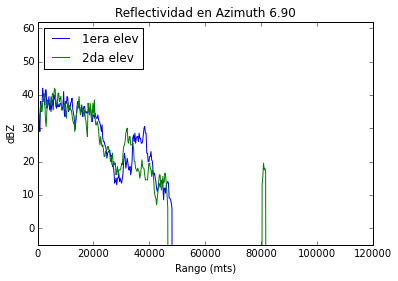

In [32]:

###Para la primera elevacion
d1=dato[0]
d2=dato[1]
###indice en el que esta el azimuth
indice1=d1.nonzero()[0][0]
indice2=d2.nonzero()[0][0]

radar1=radar.extract_sweeps([0])
radar2=radar.extract_sweeps([1])

s=radar1.fields['dBZ']['data']
s.filled()
s2=radar2.fields['dBZ']['data']
y=s.data[indice1,:]
y2=s2.data[indice2,:]

rango=radar1.range['data']
minimoy=s.min()
maximoy=s.max()
minimox=rango.min()
maximox=rango.max()
plt.plot(rango,y,label='1era elev')
plt.plot(rango,y2,label='2da elev')
plt.axis([minimox, maximox,minimoy ,maximoy])
plt.title('Reflectividad en'+ ' Azimuth %.2f' % (azi) )
plt.xlabel('Rango (mts)')
plt.ylabel('dBZ')
plt.legend(loc='upper left')
plt.show()